----

### <span style="color:#0b486b">SIT744 Practical Machine Learning 4DS</span>


----


# <span style="color:#0b486b">Assignment One: Mastering Machine Learning Process</span>
### <span style="color:#0b486b">Due: 9:00 am 20 August 2018 (Monday)</span>

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for your to complete Assignment 1. Some sections have been partially completed to help you get started. **The total marks for this notebook are 150 marks.** 

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


## <span style="color:#0b486b">Instruction</span>

This assignment contains **three** parts, in increasing order of machine learning sophistication levels as we go through the process of building an effective machine learning solution.

* Part 1: Examine and understand your dataset **[10 points]**
* Part 2: Build Model Intuition: What Works and What Doesn't **[70 points]**
* Part 3: Model Screening and Comparison **[70 points]**

**Hint**: this assignment was essentially designed based on the first three lectures and practical lab sessions. You are strongly recommended to go through these contents thoroughly which might help you complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin**:

1.	<span style="color:red">**[YourID]_assignment1_solution.ipynp**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]_assingment1_output.html**</span>: **this is the output of your Python notebook solution *exported* in HTML format**.

For example, if your student ID is: 123456, you will then need to submit two files:
* 123456_assignment1_solution.ipynp
* 123456_assignment1_output.html

<span style="color:red">Now, please proceed to content below to complete your assignment!</span>

---

## <span style="color:#0b486b">Part 1: Examine and understand your dataset </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 10 points]**.<span></div>

This assignment shares a similar theme with the practical lab session in week 2. You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

They are provided for you to get started. Please **do not** change the provided code as well the variables and function names as you will need them to complete subsequent tasks. 

---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [78]:
from sklearn import datasets

from sklearn import datasets
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# append your own importing packages here if needed
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [79]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the conda prompt.

In [80]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)

In [81]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

---

You should realise that executing the above segment of codes will result in:
- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

####  <span style="color:red">**Question 1.1**</span>. Print out the description of the dataset using the variable `faces`. 
<div style="text-align: right"><span style="color:red">**[0.5 points]**</span></div>

In [82]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(faces.DESCR)

LFW faces dataset


####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points in this dataset.
<div style="text-align: right"><span style="color:red">**[1.5 points]**</span></div> 

In [110]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(len(X)*len(X[0]))
# Student can use different field such as data, images target_names to get the number of data points 

2109000


####  <span style="color:red">**Question 1.3**</span>. Each class, or label, in this dataset correspond to a person. Print out the number of classes, and the corresponding person name for each class. Print out 20 photos of *Donald Rumsfeld* and 20 photos of *Colin Powell*. You might decide to use the function `display_faces` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [84]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and corresponding name of each class
class_ids=np.unique(y)

# [insert your code here]

print('Total number of classes:',len(class_ids))

for i in range(len(class_ids)):
    # [insert your code here]
    print('Class',class_ids[i],'is',faces.target_names[class_ids[i]])

Total number of classes: 5
Class 0 is Colin Powell
Class 1 is Donald Rumsfeld
Class 2 is George W Bush
Class 3 is Gerhard Schroeder
Class 4 is Tony Blair


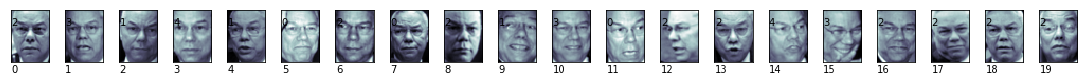

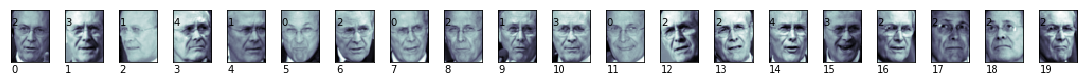

In [85]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out 20 photos of Donald Rumsfeld and 20 photos of Colin Powell
for i in range(len(class_ids)):
    if faces.target_names[class_ids[i]] in ('Colin Powell','Donald Rumsfeld'): 
        display_faces(faces.images[y==i],y,20)

####  <span style="color:red">**Question 1.4**</span>. Given our problem of interest is face recognition, should we choose clustering, classification, or regression machine learning methods? Explain why and list at least three ML algorithms that are suitable for this problem.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

This problem is a classification problem. The faces belong to different people. The names of these people can be thought of as various categories. The task is to classify the image to a particular name. Machine learning algorithms that are suitable include: kneighbors classifier, linear support vector machines, support vector machines and ensemble classifiers.

####  <span style="color:red">**Question 1.5**</span>. create *a single train-split* with 30% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [86]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# split into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=32)

---

### <span style="color:#0b486b">Part 2: Build Model Intuition: What Works and What Doesn't </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 70 points]**.<span></div>

After we have gained a good understanding of the dataset from the previous step, we should by now be clear of the following points:

- Do you have labels for this data? And hence, is it a supervised learning or unsupervised learning problem?
- Recall that machine learning prediction is about learning a function $y= f(x)$ where $y$ is your label. Python variables `X` and `y` have been constructed and stored for you.
- Variable `X` is a matrix, with each row is a vector $x_i$ assigned with label $y_i$. You should examine the data types (continuous, categorical, its dimensionality, etc.) of the features in `X` and the label in $y$. This will help you choose the right ML methods.

These are the most common questions. Depending on the answers, more refined questions and considerations may be required for an improved solution.

As a machine learning practitioner, it is rarely the case that you can come up with the best solution at the first attempt. It is an iterative process. With the experience building up over time, you will be more efficient at it. **The next step is to get your hand dirty, start to explore to see what work, what doesn't work**. This process usually starts with models that are simple or more familiar to you.

####  <span style="color:red">**Question 2.1**</span>. Using *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:

The total marks for this question are <span style="color:red">**[40 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write a Scikit-Learn pipeline of two steps: 
PCA for dimensionality reduction followed by logistic regression for classification.**
<div style="text-align: right"> <span style="color:red">**[5 points]**</span> </div>

In [87]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
pca = decomposition.PCA()

logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

pipe_face_recognition = Pipeline(steps=[('pca', pca),('logistic', logistic)])

<span style="color:red">**(b)**</span> ** Set the pipeline obtained in previous steps to keep the top *30 principal components*,  fit the training data, and then show the performance (recall, precision, accuracy, F-score) using the test data. **
<div style="text-align: right"> <span style="color:red">**[5 points]**</span> </div>

In [105]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# [insert your codes here]
pipe_face_recognition.set_params(pca__n_components=30)
pipe_face_recognition.fit(X_train, y_train)
pred_labels = pipe_face_recognition.predict(X_test)
print(('Accuracy: {}').format(accuracy_score(y_test,pred_labels)))
print(('Precision: {}').format(precision_score(y_test,pred_labels,average='macro')))
print(('Recall: {}').format(recall_score(y_test,pred_labels,average='macro')))
print(('F-Score: {}').format(f1_score(y_test,pred_labels,average='macro')))

Accuracy: 0.8011695906432749
Precision: 0.7698211927470914
Recall: 0.7259140561589521
F-Score: 0.7447876486746919


<span style="color:red">**(c)**</span>** Write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for traning and testing) on the training data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [89]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# [insert your codes here]
ss = ShuffleSplit(n_splits=10, test_size=0.40,random_state=0)
scores = cross_validate(pipe_face_recognition, X, y, scoring=metrics,cv=ss, return_train_score=False)    
eval_metrics = ['fit_time','score_time','test_accuracy','test_precision_macro',
               'test_recall_macro','test_f1_macro']
for i in eval_metrics:
    print((i+' mean: {}').format(scores[i].mean()))
    print((i+' standard deviation: {}').format(scores[i].std()))

fit_time mean: 0.1053931474685669
fit_time standard deviation: 0.014590960700788552
score_time mean: 0.021927547454833985
score_time standard deviation: 0.0031362599742275335
test_accuracy mean: 0.7861842105263159
test_accuracy standard deviation: 0.01245374637236904
test_precision_macro mean: 0.7487395703896633
test_precision_macro standard deviation: 0.02589766474221239
test_recall_macro mean: 0.6989955629269765
test_recall_macro standard deviation: 0.015257431012117743
test_f1_macro mean: 0.7178957527756955
test_f1_macro standard deviation: 0.018129389982778982


<span style="color:red">**(d)**</span>** Write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds* on the training data. **.
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [90]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
scores_kf = cross_validate(pipe_face_recognition, X, y, scoring=metrics,cv=10, return_train_score=False)
for i in eval_metrics:
    print((i+' mean: {}').format(scores_kf[i].mean()))
    print((i+' standard deviation: {}').format(scores_kf[i].std()))

fit_time mean: 0.13081610202789307
fit_time standard deviation: 0.010398300832955279
score_time mean: 0.0066537618637084964
score_time standard deviation: 0.0016487976058047835
test_accuracy mean: 0.798101269953552
test_accuracy standard deviation: 0.02992271460856535
test_precision_macro mean: 0.7727382124246605
test_precision_macro standard deviation: 0.03589646823023196
test_recall_macro mean: 0.7163457182686059
test_recall_macro standard deviation: 0.04059125417623666
test_f1_macro mean: 0.7340452608429359
test_f1_macro standard deviation: 0.0405238646087651


<span style="color:red">**(e)**</span>** Preparing a table to summarize the performances obtained from step (c) and and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|Part B|0.7259140561589521|0.7698211927470914|0.8011695906432749|0.7447876486746919|
|Part C (mean)|0.6989955629269765|0.7487395703896633|0.7861842105263159|0.7178957527756955|
|Part D (mean)|0.7163457182686059|0.7727382124246605|0.798101269953552|0.7340452608429359||

Conclusion:
For all four evaluation metrics, the Logistic Regression algorithm is performing best, followed by K-Fold cross validation. Repeated random splits is performing the worst. 

<span style="color:red">**Question 2.2.**</span> ** Once you have build some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Logistic Regression a good choice? Did the reduced dimension help to improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question is <span style="color:red">**[30 points]**</span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as a example of how one might 'package' the important steps so far into a single function to help accelerating your**.

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span>** Write your code to call this function with following specification and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Logistic Regression (using l1 regulaization)
    - PCA dimnesion = 30
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [92]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
output_of_function = ml_algorithm_screening_face(X=X,y=y,model=LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1),
            model_name="logistic",scoring_metrics='accuracy',pca_dim=30,n_runs=10)

print(('mean of accuracy: {}').format(output_of_function.mean()))
print(('standard deviation of accuracy: {}').format(output_of_function.std()))

mean of accuracy: 0.7991228070175438
standard deviation of accuracy: 0.032456140350877204


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


<span style="color:red">**(b)**</span>** Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimesion.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.1(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the mean and standard deviation of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red">**[20 points]**<span> </div>

Mean of 10 dimensional PCA: 0.5368421052631579
Standard Deviation of 10 dimensional PCA: 0.037993697943346866


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


Mean of 20 dimensional PCA: 0.6947368421052632
Standard Deviation of 20 dimensional PCA: 0.02823417006917734


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


Mean of 30 dimensional PCA: 0.7973684210526317
Standard Deviation of 30 dimensional PCA: 0.03430037683511782


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


Mean of 40 dimensional PCA: 0.8333333333333333
Standard Deviation of 40 dimensional PCA: 0.020758174677542512


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


Mean of 50 dimensional PCA: 0.8377192982456141
Standard Deviation of 50 dimensional PCA: 0.023619143890940813


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


Mean of 60 dimensional PCA: 0.8377192982456141
Standard Deviation of 60 dimensional PCA: 0.02457706267740682


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


Mean of 70 dimensional PCA: 0.8403508771929825
Standard Deviation of 70 dimensional PCA: 0.029565437800618807


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


Mean of 80 dimensional PCA: 0.8385964912280702
Standard Deviation of 80 dimensional PCA: 0.03379186014782142


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


Mean of 90 dimensional PCA: 0.8324561403508772
Standard Deviation of 90 dimensional PCA: 0.04393852556620419


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


Mean of 100 dimensional PCA: 0.8245614035087719
Standard Deviation of 100 dimensional PCA: 0.0405790649341066


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished


Mean of 110 dimensional PCA: 0.8254385964912281
Standard Deviation of 110 dimensional PCA: 0.034523980095007775


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished


Mean of 120 dimensional PCA: 0.8087719298245615
Standard Deviation of 120 dimensional PCA: 0.03230167129740697


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.6s finished


Mean of 130 dimensional PCA: 0.8087719298245613
Standard Deviation of 130 dimensional PCA: 0.033008574951275044


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished


Mean of 140 dimensional PCA: 0.7991228070175438
Standard Deviation of 140 dimensional PCA: 0.023684210526315797


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


Mean of 150 dimensional PCA: 0.8122807017543859
Standard Deviation of 150 dimensional PCA: 0.01969293361459969


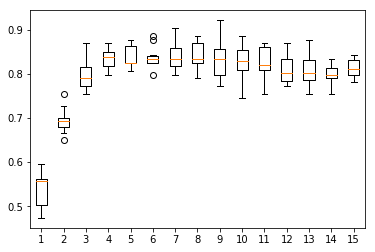

Dimension for PCA that gives the best result: 70


In [93]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# [insert your code here]
bp = []
bp_mean = []
for i in range(10, 151, 10):
    output_of_function = ml_algorithm_screening_face(X=X,y=y,model=LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1),
            model_name="logistic",scoring_metrics='accuracy',pca_dim=i,n_runs=10)
    print(('Mean of '+str(i)+' dimensional PCA: {}').format(output_of_function.mean()))
    print(('Standard Deviation of '+str(i)+' dimensional PCA: {}').format(output_of_function.std()))
    bp.append(output_of_function)
    bp_mean.append(output_of_function.mean())
    if i == 150:
        plt.boxplot(bp)
        plt.show()

max_dimension = np.argmax(bp_mean)*10+10
print('Dimension for PCA that gives the best result: {}'.format(max_dimension))

---
### Part 3: Model Screening and Comparison
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 70 points]**.<span></div>

**By now, you should have a very good idea of data, some models and parameters that might perform well for your problem. However, by no means it should be best. **

**The last part of this assignment is about the skill to screen best model for your problem. Going beyond the question 'which model is applicable to my problem?', you should start to ask the question 'which set of models should I test for my problem?'.**

**It is important to screen through different types of ML algorithms and then select the most appropriate algorithm for your data. As it is commonly used in practice, in this assigment, you are suggested to explore 3 groups of models, each including 2 to 3 algorithms. **

1. Linear classification models
    - Logistic Regression
    - Linear Discriminant Analysis (LDA)
2. Non-linear classification models
    - Support Vector Machines
    - Neural Networks
3. Non-parametric and probabilistic classification models
    - Random Forest Classifier
    - K-NN Classifer
    - GaussianNB

<span style="color:red">**Question 3.1**</span>** Fixing the PCA dimension to the value you founded in Part 2, write your code to compare the performance among these two linear models. Which model performs better? and write down any observation you might have.** 

* [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Linear Discriminant Analysis (LDA)](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [100]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

#  Write your code to compare the performance among linear models. 
#     - Logistic Regression
#     - LinearDiscriminantAnalysis (LDA)

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# [insert your code here]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
logistic_output_array=[]
lda_output_array=[]
for i in range(0,4):
    logistic_output = ml_algorithm_screening_face(X=X,y=y,model=LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1),
            model_name="logistic",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10)
    lda_output = (ml_algorithm_screening_face(X=X,y=y,model=LinearDiscriminantAnalysis(),
            model_name="lda",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10))
    logistic_output_array.append(logistic_output.mean()) # can be used to print out results, if required
    lda_output_array.append(lda_output.mean()) # can be used to print out results, if required
    if logistic_output.mean() != lda_output.mean():
        if logistic_output.mean() > lda_output.mean():
            linear_comparison_output = 'Logistic Regression'
        elif lda_output.mean() > logistic_output.mean():
            linear_comparison_output = 'LDA'
        print('The better metric according to the '+metrics[i]+' metric is: '+linear_comparison_output)
    else:
        print('In terms of metric '+i+' both models are equal')

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


The better metric according to the accuracy metric is: LDA


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


The better metric according to the precision_macro metric is: LDA


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


The better metric according to the recall_macro metric is: LDA


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


The better metric according to the f1_macro metric is: LDA
[0.8403508771929825, 0.8167305393215532, 0.7940891754263608, 0.8007128356473412]
[0.8596491228070174, 0.8314398356200282, 0.8246929390979882, 0.8242768985490878]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


<span style="color:red">**Question 3.2**</span>** Fixing the PCA dimension to the value you founded in Part 2, write your code to compare the performance among these two nonlinear models. Which model performs better? and write down any observation you might have.** 
* [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Neural Networks](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [103]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Write your code to  compare the performance among non-linear models.
#     - Support Vector Machines (SVM)
#     - Neural Networks

# [insert your code here]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
svm_output_array = []
nn_output_array = []

for i in range(0,4):
    svm_output = ml_algorithm_screening_face(X=X,y=y,model=SVC(),
            model_name="logistic",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10)
    nn_output = (ml_algorithm_screening_face(X=X,y=y,model=MLPClassifier(),
            model_name="lda",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10))
    svm_output_array.append(svm_output.mean()) # can be used to print out results, if required
    nn_output_array.append(nn_output.mean()) # can be used to print out results, if required
    if svm_output.mean() != nn_output.mean():
        if svm_output.mean() > nn_output.mean():
            non_linear_comparison_output = 'SVC'
        elif nn_output.mean() > svm_output.mean():
            non_linear_comparison_output = 'Neural Networks'
        print('The better metric according to the '+metrics[i]+' metric is: '+non_linear_comparison_output)
    else:
        print('In terms of metric '+metrics[i]+' both models are equal')

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


The better metric according to the accuracy metric is: Neural Networks


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_fo

The better metric according to the precision_macro metric is: Neural Networks


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


The better metric according to the recall_macro metric is: Neural Networks


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anac

The better metric according to the f1_macro metric is: Neural Networks


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


<span style="color:red">**Question 3.3**</span>** Fixing the PCA dimension to the value you founded in Part 2, write your code to compare the performance among these non-parametric and probabilistic models. Which model performs better? and write down any observation you might have.** 
* [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [K-NN Classifer](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

<div style="text-align: right"> <span style="color:red">**[15 points]**</span> </div>

In [102]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Write your code to compare the performance among non-parametric and probabilistic models.
#     - Random Forest Classifier
#     - K-NN Classifer
#     - GaussianNB

# [insert your code here]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
random_forest_output_array = []
knn_output_array = []
gaussian_nb_output_array = []

for i in range(0,4):
    random_forest_output = ml_algorithm_screening_face(X=X,y=y,model=RandomForestClassifier(),
            model_name="logistic",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10)
    knn_output = (ml_algorithm_screening_face(X=X,y=y,model=KNeighborsClassifier(),
            model_name="lda",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10))
    gaussian_nb_output = (ml_algorithm_screening_face(X=X,y=y,model=GaussianNB(),
            model_name="lda",scoring_metrics=metrics[i],pca_dim=max_dimension,n_runs=10))
    random_forest_output_array.append(random_forest_output.mean()) # can be used to print out results, if required
    knn_output_array.append(knn_output.mean()) # can be used to print out results, if required
    gaussian_nb_output_array.append(gaussian_nb_output.mean()) # can be used to print out results, if required
    if (random_forest_output.mean() != knn_output.mean()) and (random_forest_output.mean() != gaussian_nb_output.mean()):
        if (random_forest_output.mean() > knn_output.mean()) and (random_forest_output.mean() > gaussian_nb_output.mean()):
            nonParametric_probabilistic_comparison_output = 'Random Forest Classifier'
        elif (knn_output.mean() > random_forest_output.mean()) and (knn_output.mean() > gaussian_nb_output.mean()):
            nonParametric_probabilistic_comparison_output = 'K-NN Classifier'
        elif (gaussian_nb_output.mean() > random_forest_output.mean()) and (gaussian_nb_output.mean() > knn_output.mean()):
            nonParametric_probabilistic_comparison_output = 'GaussianNB'
        print('The better metric according to the '+metrics[i]+' metric is: '+nonParametric_probabilistic_comparison_output)
    else:
        print('In terms of metric '+metrics[i]+' all models are equal')

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


The better metric according to the accuracy metric is: GaussianNB


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


The better metric according to the precision_macro metric is: GaussianNB


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


The better metric according to the recall_macro metric is: GaussianNB


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


The better metric according to the f1_macro metric is: GaussianNB


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


<span style="color:red">**Question 3.1**</span>.** Write a summary and report the performance of chosen models in terms of different metrics: precision, recall, accuracy, F-measure.**
* Report the metrics of all methods in the following table, *bold* the best performance for each evaluation metrics (e.g., recall, precision, accuracy, F-measure)
* Which model gives best performance in terms of accuarcy?
* What are the lessions you have learned and conclusions you can made about this face recognition problem overall?
    
|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|  Logistic Regression |0.7940891754263608|0.8167305393215532|0.8403508771929825|0.8007128356473412|
|  LDA |**0.8246929390979882**|**0.8314398356200282**|**0.8596491228070174**|**0.8242768985490878**|
|  SVM |0.2|0.09298245614035087|0.4649122807017544|0.12664032586611185|
|  Neural Networks |0.6677402228620324|0.6594357328650572|0.7219298245614035|0.666080356257787|
|  Random Forest |0.44012896964241016|0.576410085300731|0.6078947368421054|0.4527014673273525|
|  K-NN |0.4880060766857432|0.5936555025417326|0.6350877192982456|0.4909418696831122|
|  GaussianNB |0.721605694663128|0.7976397729212485|0.8008771929824562|0.7493865574772098| |

<div style="text-align: right"> <span style="color:red">**[35 points]**</span> </div>

The best performing model in terms of accuracy is Linear Discriminant Analysis (LDA).

The lesson that I have learned is that the principal of parsimony stands true for this machine learning problem. The simplest solution, linear classification, produces the best result. I have also learned that it is impossible for an algorithm to predict the ouput correctly 100% of the time. Perphaps the algorithm can get very close given enough data to train on. 

 **You might also like to write new codes for this question. Feel free to insert as many cells as needed below to complete your task.**

---
<div style="text-align: center">**END OF ASSIGNMENT ONE**</div>